In [1]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np

In [2]:
def run_infect(g):
    for node in g.nodes:
        if g.nodes[node]['Status']=='Infected':
            neighbours=g.neighbors(node)
            for neighbour in neighbours:
                if g.nodes[neighbour]['Status']=='Susceptible':
                    p=np.random.rand()
                    if p<=beta:
                        g.nodes[neighbour]['Status']='Infected'
            p=np.random.rand()
            if p<=mu:
                g.nodes[node]['Status']='Recovered'
    return g
                
def run_sensus(g):
    S,I,R=0,0,0
    for node in g.nodes:
        if g.nodes[node]['Status']=='Susceptible':
            S+=1
        if g.nodes[node]['Status']=='Infected':
            I+=1
        if g.nodes[node]['Status']=='Recovered':
            R+=1
    return S,I,R

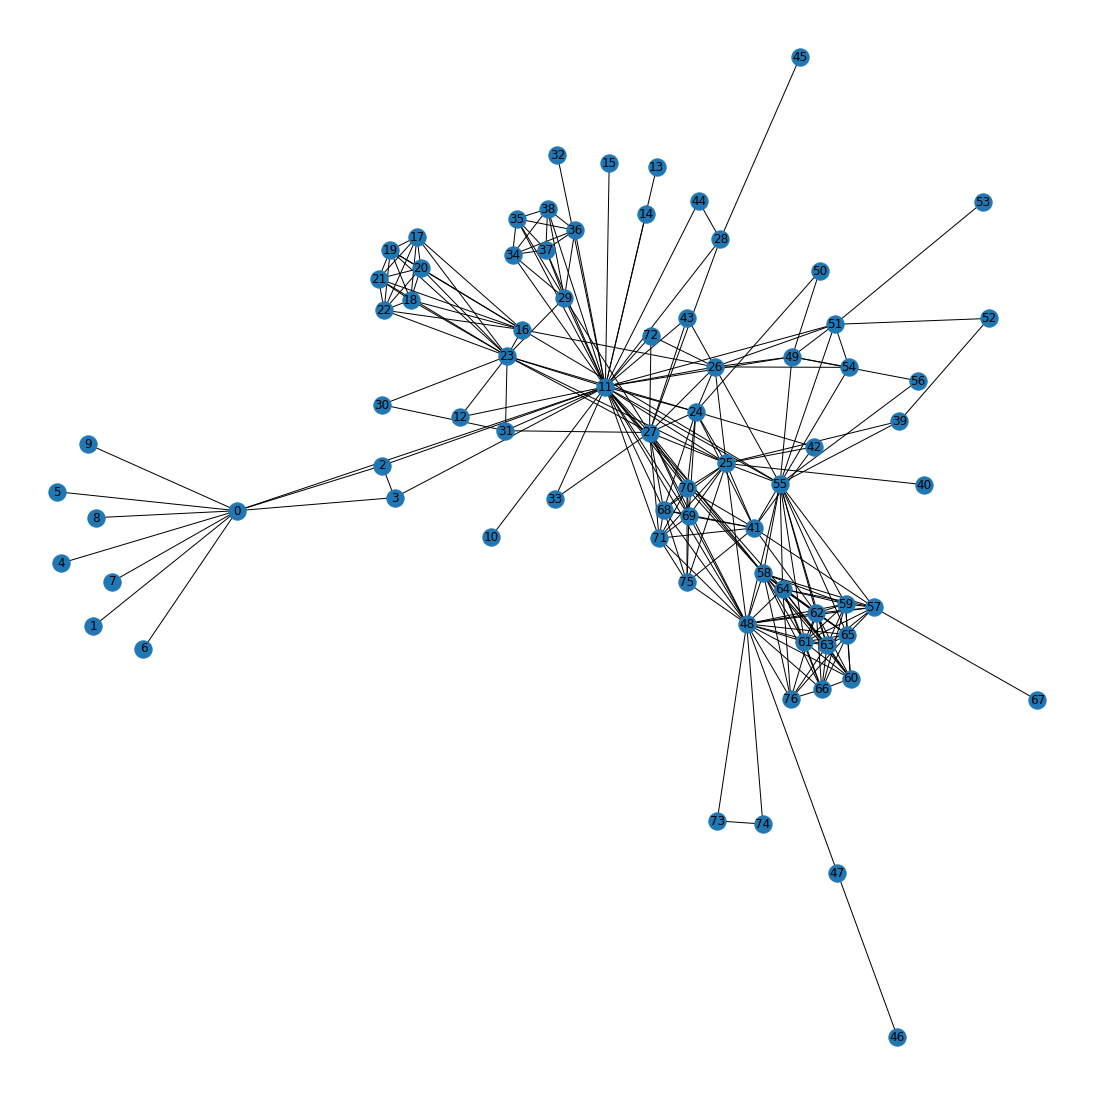

In [3]:
g_original = nx.read_edgelist("hugo_graph.txt",create_using=nx.DiGraph(), nodetype = int)
g_original = g_original.to_undirected()

nodes=g_original.nodes()
for node in nodes:
    g_original.nodes[node]['Status']='Susceptible'

plt.figure(figsize=(15,15))
pos=nx.spring_layout(g_original,scale=6,k=2,iterations=1000)
nx.draw(g_original,pos,scale=6,with_labels = True)

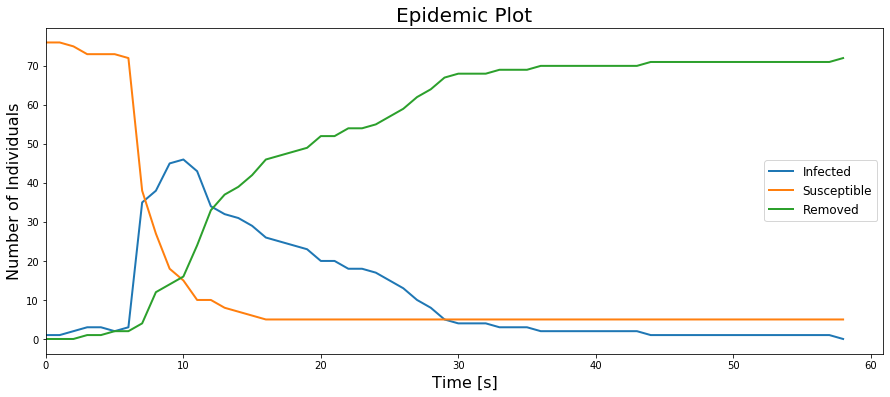

In [6]:
beta=0.2
mu=0.1
t_max=1000

#start_node=24
start_node=np.random.choice(nodes)
g=g_original.copy()
g.nodes[start_node]['Status']='Infected'

S_vector=[]
I_vector=[]
R_vector=[]
t_vector=[]

S=len(nodes)-1
I=1
R=0

S_vector.append(S)
I_vector.append(I)
R_vector.append(R)
t_vector.append(0)

for t in range(1,t_max):
    g=run_infect(g)
    S,I,R=run_sensus(g)
    S_vector.append(S)
    I_vector.append(I)
    R_vector.append(R)
    t_vector.append(t)
    if I==0:
        break
    
plt.figure(figsize=(15,6))
plt.plot(t_vector,I_vector, linewidth=2)
plt.plot(t_vector,S_vector, linewidth=2)
plt.plot(t_vector,R_vector, linewidth=2)
plt.legend(['Infected','Susceptible','Removed'], fontsize=12)
plt.title('Epidemic Plot', fontsize=20)
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Number of Individuals', fontsize=16)
plt.xlim([0, t_vector[-1]+t_vector[-1]/20])
fname='T2_Images/beta='+str(beta)+', mu='+str(mu)+', start_node='+str(start_node)+'.png'
#plt.savefig(fname,dpi=600)
plt.show()